## Importing Libraries

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.stats import beta
import gif
from IPython.display import Image

## Maximum Likelihood Estimator & Dataset

In [184]:
# dataset of size = 160
size = 160
# randomly generaing max likelihood estimator
uml = np.random.rand()
# to ensure max likelihood estimator does not fall in the range [0.4, 0.6]
while uml >= 0.4 and uml <= 0.6:
    uml = np.random.rand()
# randomly generating a dataset of 160 coin tosses
data = np.random.choice([0, 1], size=size, p=[1 - uml, uml])
unique, counts = np.unique(data, return_counts = True)

In [185]:
print(f"µml = {counts[1] / 160}")

µml = 0.9625


## Prior Distribution

$$p(𝜇| 𝑎, 𝑏) = 𝐵𝑒𝑡𝑎(𝜇| 𝑎, 𝑏) = \frac{𝛤(𝑎 + 𝑏)}{{𝛤(𝑎)}{𝛤(𝑏)}}  𝜇 ^{𝑎−1}  (1 − 𝜇) ^{𝑏−1}$$

$$E[µ] = \frac{a}{a + b} $$

$$var[µ] = \frac {ab}{(a + b)^2(a + b + 1)}$$

__Defining Beta Function__

In [186]:
def beta(x, a, b):
    return (gamma(a + b) / (gamma(a) + gamma(b))) * x**(a - 1) * (1 - x)**(b - 1)

__Plotting Prior Distribution__

Given, $E[µ] = 0.4$. Therefore, $a = \frac{2}{3} b$. The values of $a$ and $b$ are taken as $2$ and $3$ respectively.

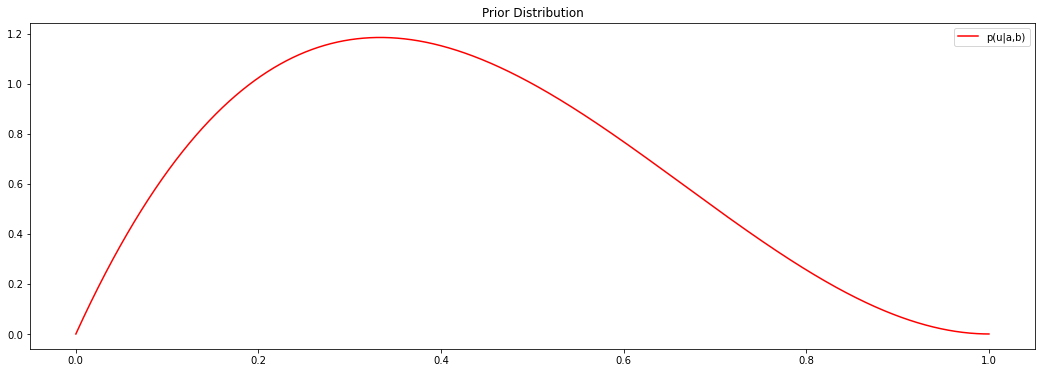

In [187]:
# Assumed hyperparameters of Beta Distribution
a , b = 2, 3
x = np.linspace(0, 1, 10000)
fig = plt.figure(figsize = (18, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Prior Distribution")
ax.plot(x, beta(x, a, b), color = "red", label="p(u|a,b)")
ax.legend();

## Posterior Distribution

$$p(µ|m, l, a, b) ∝ µ^{m+a−1}(1 − µ)^{l+b−1}$$

$$p(µ|m, l, a, b) = \frac{Γ(m + a + l + b)}{Γ(m + a)Γ(l + b)} µ^{m+a−1}(1 − µ)^{l+b−1}$$

__Using Whole Dataset__

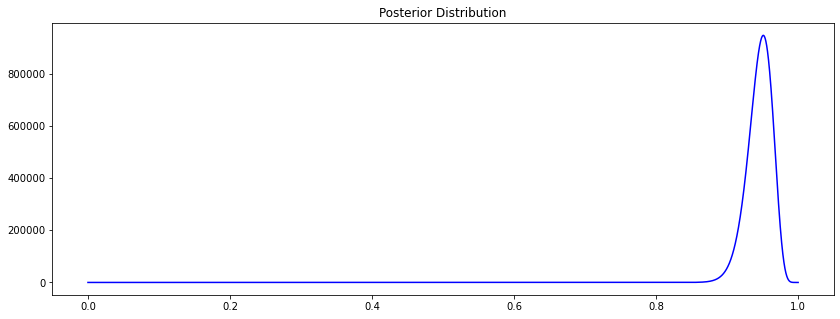

In [188]:
a , b = 2, 3
m, l = counts[1], counts[0]
x = np.linspace(0, 1, 10000)
fig = plt.figure(figsize = (14, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Posterior Distribution")
ax.plot(x, beta(x, a + m, b + l), color = "blue");

__Sequential Approach__

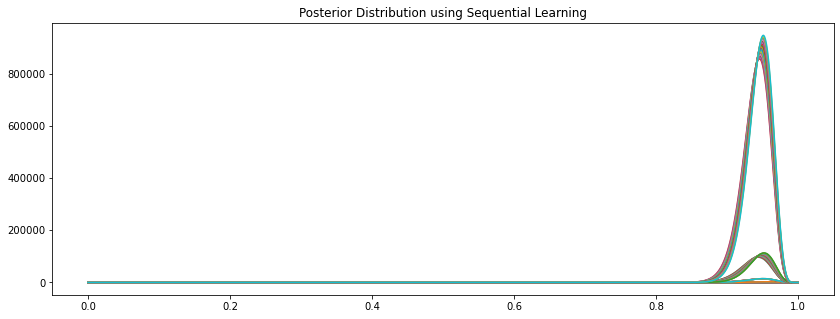

In [189]:
a, b = 2, 3
m, l = 0, 0
x = np.linspace(0, 1, 10000)
fig = plt.figure(figsize = (14, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Posterior Distribution using Sequential Learning")
for i in data:
    if i == 1:
        m += 1
    else:
        l += 1
    ax.plot(x, beta(x, a+m, b+l))

__Converting Sequential Plots into GIF__

In [190]:
a, b = 2, 3
m, l = 0, 0
x = np.linspace(0, 1, 10000)
@gif.frame
def plot(a, b, m, l):
    y = beta(x, a + m, b + l)
    plt.plot(x, y)
    plt.xlim((0, 1))

In [191]:
frames = []
for i in data:
    if i == 1:
        m += 1
    else:
        l += 1
    frame = plot(a, b, m, l)
    frames.append(frame)

In [192]:
gif.save(frames, 'I:\sequential_training.gif', duration=100, unit="ms", loop=True, between="frames")

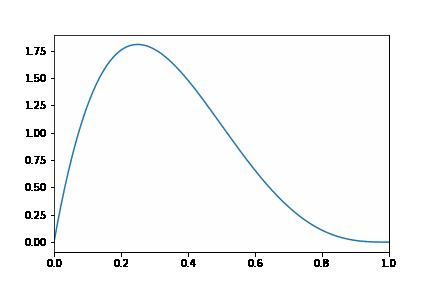

In [193]:
Image("I:/DS/Projects/A1/sequential_training.gif")